<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

<h1 align=center><font size = 5>Assignment: SQL Notebook for Peer Assignment</font></h1>

Estimated time needed: **60** minutes.

## Introduction
Using this Python notebook you will:

1.  Understand the Spacex DataSet
2.  Load the dataset  into the corresponding table in a Db2 database
3.  Execute SQL queries to answer assignment questions 


## Overview of the DataSet

SpaceX has gained worldwide attention for a series of historic milestones. 

It is the only private company ever to return a spacecraft from low-earth orbit, which it first accomplished in December 2010.
SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars wheras other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. 


Therefore if we can determine if the first stage will land, we can determine the cost of a launch. 

This information can be used if an alternate company wants to bid against SpaceX for a rocket launch.

This dataset includes a record for each payload carried during a SpaceX mission into outer space.


### Download the datasets

This assignment requires you to load the spacex dataset.

In many cases the dataset to be analyzed is available as a .CSV (comma separated values) file, perhaps on the internet. Click on the link below to download and save the dataset (.CSV file):

 <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv" target="_blank">Spacex DataSet</a>



In [1]:
!pip install sqlalchemy==1.3.9


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 120.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... one
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.9-cp312-cp312-linux_x86_64.whl size=1160111 sha256=84ff6e7f03a72b4d47dd014f4bbf8305b5de647c53de282b614c38b547d62573
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/b3/1c/42/0e26b8d512adc6bce10ff71a05229366b4ccec641cd3b42111
Successfully built sqlalchemy
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.37
    Uninstalling SQLAlchemy-2.0.37:
      Successfully uninstalled SQLAlchemy-2.0.37
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterhub 5.2.1 requires SQLAlchemy>=1.4.1, but you have sqlalchemy 1.3.9 which is incompatible.


### Connect to the database

Let us first load the SQL extension and establish a connection with the database


In [2]:
!pip install ipython-sql
!pip install ipython-sql prettytable

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 97.9 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.3.9
    Uninstalling SQLAlchemy-1.3.9:
      Successfully uninstalled SQLAlchemy-1.3.9


In [3]:
%load_ext sql

In [4]:
import csv, sqlite3
import prettytable
prettytable.DEFAULT = 'DEFAULT'

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [5]:
!pip install -q pandas

In [6]:
%sql sqlite:///my_data1.db

In [7]:
import pandas as pd
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

101

**Note:This below code is added to remove blank rows from table**


In [8]:
#DROP THE TABLE IF EXISTS

%sql DROP TABLE IF EXISTS SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


[]

In [9]:
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
Done.


[]

## Tasks

Now write and execute SQL queries to solve the assignment tasks.

**Note: If the column names are in mixed case enclose it in double quotes
   For Example "Landing_Outcome"**

### Task 1




##### Display the names of the unique launch sites  in the space mission


In [10]:
%sql SELECT DISTINCT "Launch_Site" FROM SPACEXTABLE;

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40



### Task 2


#####  Display 5 records where launch sites begin with the string 'CCA' 


In [11]:
%sql SELECT * FROM SPACEXTABLE WHERE "Launch_Site" LIKE 'CCA%' LIMIT 5;

 * sqlite:///my_data1.db
Done.


Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of Brouere cheese",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt


### Task 3




##### Display the total payload mass carried by boosters launched by NASA (CRS)


In [12]:
%sql SELECT SUM("PAYLOAD_MASS__KG_") AS Total_Payload_Mass FROM SPACEXTABLE WHERE "Customer" = 'NASA (CRS)';

 * sqlite:///my_data1.db
Done.


Total_Payload_Mass
45596


### Task 4




##### Display average payload mass carried by booster version F9 v1.1


In [13]:
%sql SELECT AVG("PAYLOAD_MASS__KG_") AS Average_Payload_Mass FROM SPACEXTABLE WHERE "Booster_Version" = 'F9 v1.1';

 * sqlite:///my_data1.db
Done.


Average_Payload_Mass
2928.4


### Task 5

##### List the date when the first succesful landing outcome in ground pad was acheived.


_Hint:Use min function_ 


In [14]:
%sql SELECT MIN("Date") AS First_Successful_Ground_Pad_Landing FROM SPACEXTABLE WHERE "Landing_Outcome" = 'Success (ground pad)';

 * sqlite:///my_data1.db
Done.


First_Successful_Ground_Pad_Landing
2015-12-22


### Task 6

##### List the names of the boosters which have success in drone ship and have payload mass greater than 4000 but less than 6000


In [15]:
%sql SELECT "Booster_Version" FROM SPACEXTABLE WHERE "Landing_Outcome" = 'Success (drone ship)' AND "PAYLOAD_MASS__KG_" > 4000 AND "PAYLOAD_MASS__KG_" < 6000;

 * sqlite:///my_data1.db
Done.


Booster_Version
F9 FT B1022
F9 FT B1026
F9 FT B1021.2
F9 FT B1031.2


### Task 7




##### List the total number of successful and failure mission outcomes


In [16]:
%sql SELECT "Mission_Outcome", COUNT(*) AS Total_Count FROM SPACEXTABLE GROUP BY "Mission_Outcome";

 * sqlite:///my_data1.db
Done.


Mission_Outcome,Total_Count
Failure (in flight),1
Success,98
Success,1
Success (payload status unclear),1


### Task 8



##### List the   names of the booster_versions which have carried the maximum payload mass. Use a subquery


In [17]:
%sql SELECT CASE WHEN "Mission_Outcome" LIKE 'Success%' THEN 'Success' ELSE 'Failure' END AS Outcome_Type, COUNT(*) AS Total_Count FROM SPACEXTABLE GROUP BY Outcome_Type;

 * sqlite:///my_data1.db
Done.


Outcome_Type,Total_Count
Failure,1
Success,100


### Task 9


##### List the records which will display the month names, failure landing_outcomes in drone ship ,booster versions, launch_site for the months in year 2015.

**Note: SQLLite does not support monthnames. So you need to use  substr(Date, 6,2) as month to get the months and substr(Date,0,5)='2015' for year.**


In [18]:
%sql SELECT substr("Date", 6, 2) AS Month, "Landing_Outcome", "Booster_Version", "Launch_Site" FROM SPACEXTABLE WHERE substr("Date", 0, 5) = '2015' AND "Landing_Outcome" = 'Failure (drone ship)';

 * sqlite:///my_data1.db
Done.


Month,Landing_Outcome,Booster_Version,Launch_Site
01,Failure (drone ship),F9 v1.1 B1012,CCAFS LC-40
04,Failure (drone ship),F9 v1.1 B1015,CCAFS LC-40


### Task 10




##### Rank the count of landing outcomes (such as Failure (drone ship) or Success (ground pad)) between the date 2010-06-04 and 2017-03-20, in descending order.


In [19]:
%sql SELECT "Landing_Outcome", COUNT(*) AS Outcome_Count FROM SPACEXTABLE WHERE "Date" BETWEEN '2010-06-04' AND '2017-03-20' GROUP BY "Landing_Outcome" ORDER BY Outcome_Count DESC;

 * sqlite:///my_data1.db
Done.


Landing_Outcome,Outcome_Count
No attempt,10
Success (drone ship),5
Failure (drone ship),5
Success (ground pad),3
Controlled (ocean),3
Uncontrolled (ocean),2
Failure (parachute),2
Precluded (drone ship),1


In [21]:
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 105.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 126.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 134.4 MB/s eta 0:00:00


In [22]:
import matplotlib.pyplot as plt

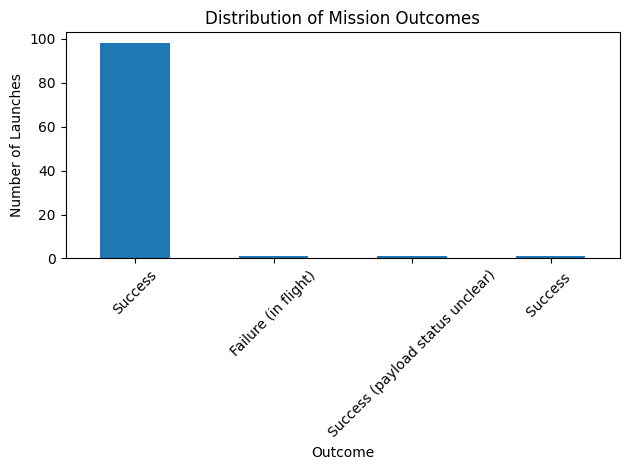

In [23]:
# Plotting the distribution of mission outcomes
df['Mission_Outcome'].value_counts().plot(kind='bar')
plt.title('Distribution of Mission Outcomes')
plt.xlabel('Outcome')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

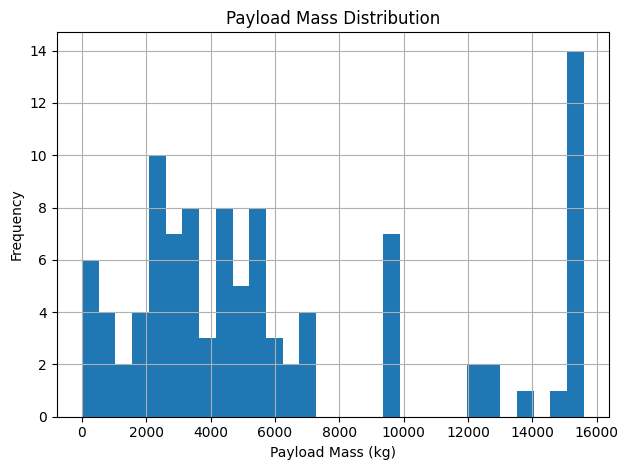

In [24]:
# Plotting the distribution of payload mass
df['PAYLOAD_MASS__KG_'].hist(bins=30)
plt.title('Payload Mass Distribution')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

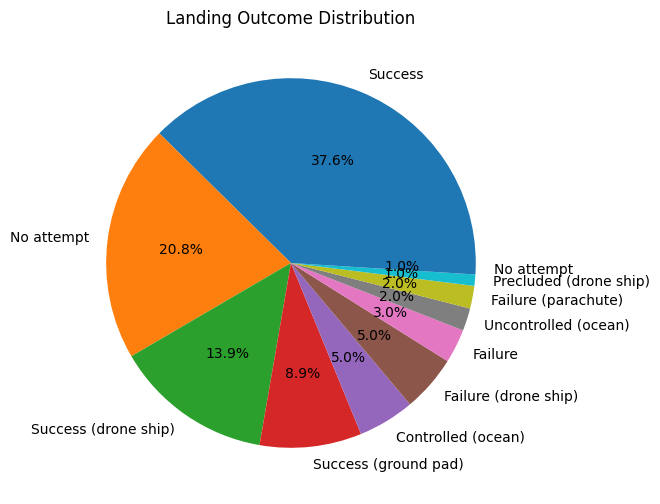

In [25]:
# Plotting the distribution of landing outcomes as a pie chart
df['Landing_Outcome'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title('Landing Outcome Distribution')
plt.ylabel('')
plt.show()

### Reference Links

* <a href ="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20String%20Patterns%20-%20Sorting%20-%20Grouping/instructional-labs.md.html?origin=www.coursera.org">Hands-on Lab : String Patterns, Sorting and Grouping</a>  

*  <a  href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20Built-in%20functions%20/Hands-on_Lab__Built-in_Functions.md.html?origin=www.coursera.org">Hands-on Lab: Built-in functions</a>

*  <a  href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Labs_Coursera_V5/labs/Lab%20-%20Sub-queries%20and%20Nested%20SELECTs%20/instructional-labs.md.html?origin=www.coursera.org">Hands-on Lab : Sub-queries and Nested SELECT Statements</a>

*   <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%205/DB0201EN-Week3-1-3-SQLmagic.ipynb">Hands-on Tutorial: Accessing Databases with SQL magic</a>

*  <a href= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DB0201EN-SkillsNetwork/labs/Module%205/DB0201EN-Week3-1-4-Analyzing.ipynb">Hands-on Lab: Analyzing a real World Data Set</a>




## Author(s)

<h4> Lakshmi Holla </h4>


## Other Contributors

<h4> Rav Ahuja </h4>


<!--
## Change log
| Date | Version | Changed by | Change Description |
|------|--------|--------|---------|
| 2024-07-10 | 1.1 |Anita Verma | Changed Version|
| 2021-07-09 | 0.2 |Lakshmi Holla | Changes made in magic sql|
| 2021-05-20 | 0.1 |Lakshmi Holla | Created Initial Version |
-->


## <h3 align="center"> © IBM Corporation 2021. All rights reserved. <h3/>
